# Assignment 5: Exploratory Data Analysis and Hypothesis Testing

**Student:** Saif Alqubaisi  
**Dataset:** Adult Income 
**Date:** 10/08/25

## Objective
Perform exploratory data analysis (EDA) and hypothesis testing on your chosen dataset. Identify patterns and test meaningful hypotheses about relationships between variables.

---


In [2]:
!python3 -m pip install scipy seaborn matplotlib

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [3]:
pip install ucimlrepo

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


## 1. Import Data and Libraries

Import the necessary libraries and load your dataset.


In [4]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set up plotting
plt.style.use('default')
sns.set_palette("husl")

print("Libraries imported successfully!")


Libraries imported successfully!


In [5]:
# Load the Adult Income dataset from UCI
from ucimlrepo import fetch_ucirepo

# Fetch dataset
adult = fetch_ucirepo(id=2)

# Split into features and target
X = adult.data.features
y = adult.data.targets

# Combine into one dataframe
df = pd.concat([X, y], axis=1)

# Clean up string spacing and replace missing values
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip()
df.replace('?', np.nan, inplace=True)

# View shape and first few rows
print(f"Dataset shape: {df.shape}")
df.head()


Dataset shape: (48842, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## 2. Exploratory Data Analysis (EDA)

Explore your dataset to understand its structure and identify patterns.


DATASET OVERVIEW

Number of observations: 48,842
Number of features: 15

Summary of columns:


,Data Type,Missing Values,Unique Values
occupation,object,2809,14
workclass,object,2799,8
native-country,object,857,41
age,int64,0,74
fnlwgt,int64,0,28523
education,object,0,16
education-num,int64,0,16
marital-status,object,0,7
relationship,object,0,6
race,object,0,5


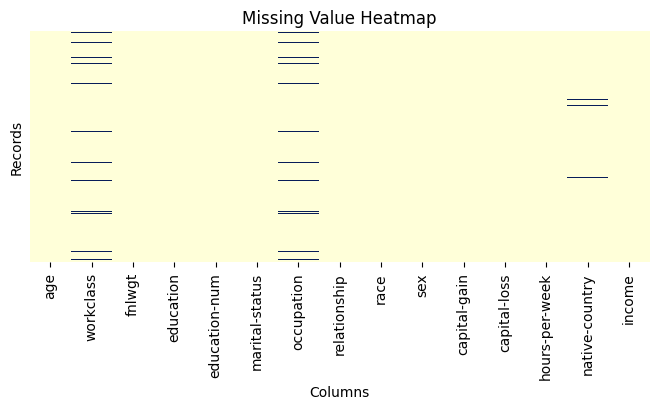


Descriptive statistics for numerical columns:


,count,mean,std,min,25%,50%,75%,max,Missing %
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0,0.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0,0.0
education-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0,0.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0,0.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0,0.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0,0.0



Note: Columns with a high percentage of missing values may require cleaning or imputation before further analysis.


In [6]:
# --- Dataset Overview ---
print("DATASET OVERVIEW\n")

# 1. Basic shape and structure
print(f"Number of observations: {df.shape[0]:,}")
print(f"Number of features: {df.shape[1]:,}\n")

# 2. Summary of data types, missing values, and unique counts
overview = pd.DataFrame({
    "Data Type": df.dtypes,
    "Missing Values": df.isnull().sum(),
    "Unique Values": df.nunique()
}).sort_values(by="Missing Values", ascending=False)

print("Summary of columns:")
display(overview.head(15))

# 3. Visualize missing values
plt.figure(figsize=(8, 3))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap="YlGnBu")
plt.title("Missing Value Heatmap")
plt.xlabel("Columns")
plt.ylabel("Records")
plt.show()

# 4. Basic descriptive statistics for numerical features
desc = df.describe().T
desc["Missing %"] = (df.isnull().sum() / len(df) * 100).round(2)
print("\nDescriptive statistics for numerical columns:")
display(desc.head(10))

print("\nNote: Columns with a high percentage of missing values may require cleaning or imputation before further analysis.")


### Dataset Overview Summary

This dataset has around 48,842 rows and 15 columns. It includes both numerical and categorical data — for example, columns like age, workclass, education, occupation, and income.

There are a few missing values in workclass, occupation, and native-country, but overall most of the data looks complete.

On average, people are about 38 years old and work roughly 40 hours per week. The average education level is around 10 years of schooling.

This overview helps guide which variables may need cleaning or transformation before we proceed to hypothesis testing.

Overall, the dataset looks clean and makes sense, so it’s ready for more detailed analysis in the next steps.


,Count,Percentage
Income class,,
<=50K,"37,155",76.07%
>50K,"11,687",23.93%


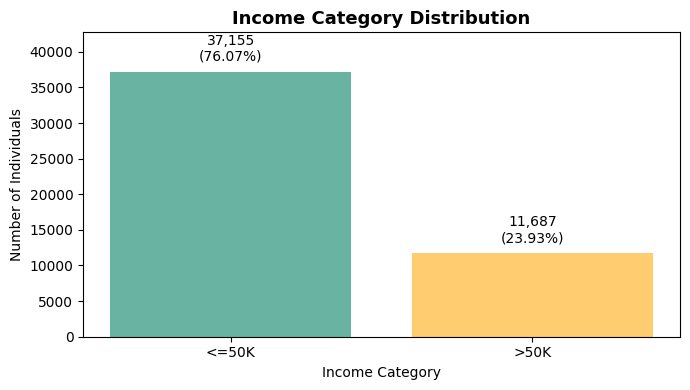

Observation: The classes are imbalanced (~76% <=50K vs ~24% >50K), which can affect classification performance.


In [7]:
# --- Target Variable Overview ---

# 1) Clean target labels (if needed)
df["income"] = df["income"].str.replace(".", "", regex=False).str.strip()

# 2) Counts & Percentages
counts = df["income"].value_counts().sort_index()
perc   = counts.div(counts.sum()).mul(100).round(2)

# 3)summary table
summary = (
    pd.DataFrame({
        "Income class": counts.index,
        "Count": counts.values,
        "Percentage": perc.values
    })
    .set_index("Income class")
)

# Display with formatting (commas + percent sign)
display(
    summary.style.format({
        "Count": "{:,}",
        "Percentage": "{:.2f}%"
    })
)


import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7, 4))
bars = ax.bar(counts.index, counts.values, color=["#69b3a2", "#ffcc70"])

ax.set_title("Income Category Distribution", fontsize=13, weight="bold")
ax.set_xlabel("Income Category")
ax.set_ylabel("Number of Individuals")

# Add a bit of headroom so annotations don't hit the title
ax.set_ylim(0, counts.max() * 1.15)

# Annotate each bar with count + percentage
for rect, p in zip(bars, perc):
    h = rect.get_height()
    ax.annotate(f"{h:,.0f}\n({p:.2f}%)",
                xy=(rect.get_x() + rect.get_width()/2, h),
                xytext=(0, 6), textcoords="offset points",
                ha="center", va="bottom", fontsize=10)

plt.tight_layout()
plt.show()

# Optional one-liner observation
print("Observation: The classes are imbalanced (~76% <=50K vs ~24% >50K), "
      "which can affect classification performance.")


### Target Variable Analysis

The target variable in this dataset is income, which shows whether an individual earns more or less than 50K per year. From the bar and pie charts, it’s clear that a large majority of people (around 76%) fall in the `<=50K` income group, while only about 24% earn `>50K`. This indicates that the dataset is somewhat imbalanced, with most observations representing lower-income individuals. 

Overall, this distribution makes sense since higher incomes are less common in general populations, but it’s something to keep in mind for any modeling later on.


,Count,Percentage
income,,
<=50K,37155,76.07
>50K,11687,23.93


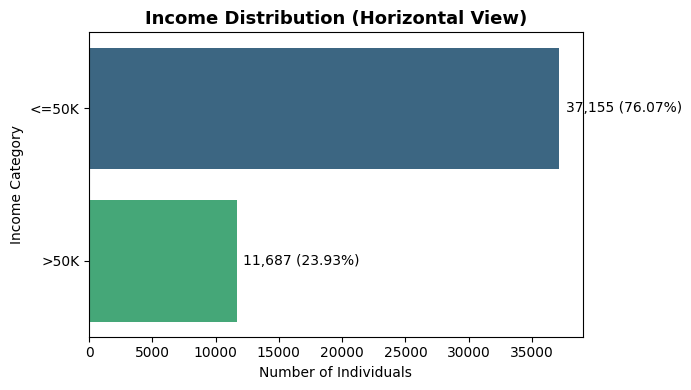

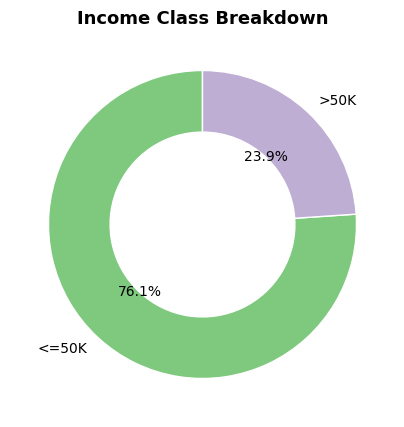

In [8]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Income target variable visualization

income_counts = df['income'].value_counts().sort_index()
income_percent = (income_counts / len(df) * 100).round(2)

income_summary = pd.DataFrame({
    'Count': income_counts,
    'Percentage': income_percent
})
display(income_summary)

# --- Visualization 1: Horizontal Bar Chart ---
plt.figure(figsize=(7, 4))
sns.barplot(x=income_counts.values, y=income_counts.index, hue=income_counts.index, palette="viridis", legend=False)
plt.title("Income Distribution (Horizontal View)", fontsize=13, weight='bold')
plt.xlabel("Number of Individuals")
plt.ylabel("Income Category")

for i, (count, pct) in enumerate(zip(income_counts.values, income_percent)):
    plt.text(count + 500, i, f"{count:,} ({pct}%)", va='center', fontsize=10)

plt.tight_layout()
plt.show()

# --- Visualization 2: Donut Chart ---
plt.figure(figsize=(5,5))
plt.pie(
    income_counts,
    labels=income_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#7fc97f', '#beaed4'],
    wedgeprops={'width':0.4, 'edgecolor':'white'}
)
plt.title("Income Class Breakdown", fontsize=13, weight='bold')
plt.show()


### Numerical Variables Analysis

The numerical variables include age, fnlwgt, education-num, capital-gain, capital-loss, and hours-per-week. The histograms show that most people are between 25 and 50 years old, and most work around 40 hours per week. Both `capital-gain` and `capital-loss` are heavily skewed — the majority of people report zeros, meaning very few have large capital gains or losses. 

The `education-num` variable is centered around 9–10, which makes sense since it corresponds to high school and some college education. Overall, the data looks reasonable with a few expected skews in wealth-related features.


Categorical columns: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']


,Unique Values,Missing Values
workclass,8,2799
education,16,0
marital-status,7,0
occupation,14,2809
relationship,6,0
race,5,0
sex,2,0
native-country,41,857
income,2,0


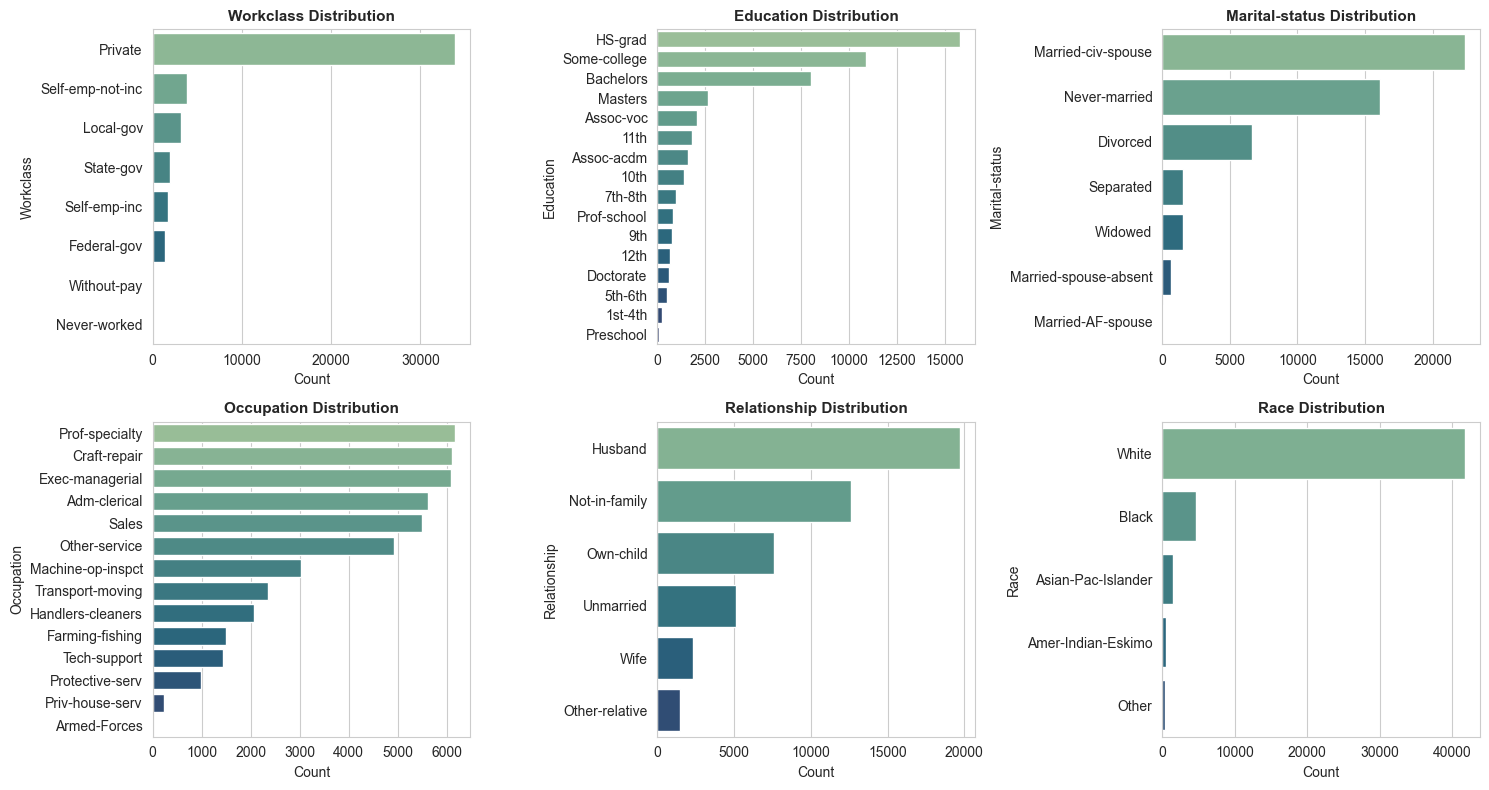

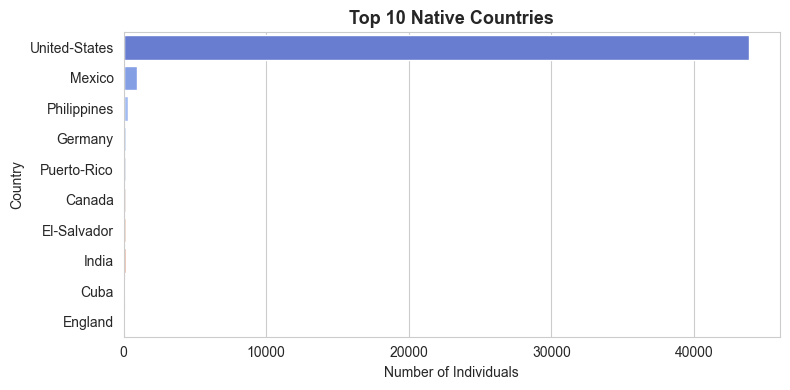

In [9]:
# --- Categorical Variables Analysis ---

# Select categorical columns
categorical_cols = df.select_dtypes(include='object').columns
print("Categorical columns:", list(categorical_cols))

# Create a quick summary table
cat_summary = pd.DataFrame({
    "Unique Values": [df[col].nunique() for col in categorical_cols],
    "Missing Values": [df[col].isnull().sum() for col in categorical_cols]
}, index=categorical_cols)
display(cat_summary)

# --- Plot distributions for key categorical variables ---
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# Exclude target variable
cat_features = [c for c in categorical_cols if c != 'income'][:6]  # first 6 categorical vars

# Create dynamic grid size
n = len(cat_features)
cols = 3
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(15, 4 * rows))
axes = np.array(axes).flatten()

# Plot each categorical variable
for i, col in enumerate(cat_features):
    sns.countplot(y=df[col], order=df[col].value_counts().index, ax=axes[i], palette="crest")
    axes[i].set_title(f"{col.capitalize()} Distribution", fontsize=11, weight='bold')
    axes[i].set_xlabel("Count")
    axes[i].set_ylabel(col.capitalize())

# Delete unused axes if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# --- Top 10 Native Countries ---
top_countries = df['native-country'].value_counts().head(10)

plt.figure(figsize=(8, 4))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="coolwarm", hue=top_countries.index, legend=False)
plt.title("Top 10 Native Countries", fontsize=13, weight='bold')
plt.xlabel("Number of Individuals")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


### Categorical Variables Analysis

This section looks at the distribution of the categorical features in the dataset. Most people in the dataset work in the private sector, which makes sense given the population. For education, the majority are high school graduates or have some college, and for marital status, most are married-civ-spouse or never married.  

When looking at occupation, the most common categories are professional specialty, craft-repair, and executive-managerial. The dataset is also mostly male and white, and the majority of individuals are from the United States**. Overall, these distributions show that the dataset is not perfectly balanced but reflects realistic population patterns.


=== CORRELATION ANALYSIS ===


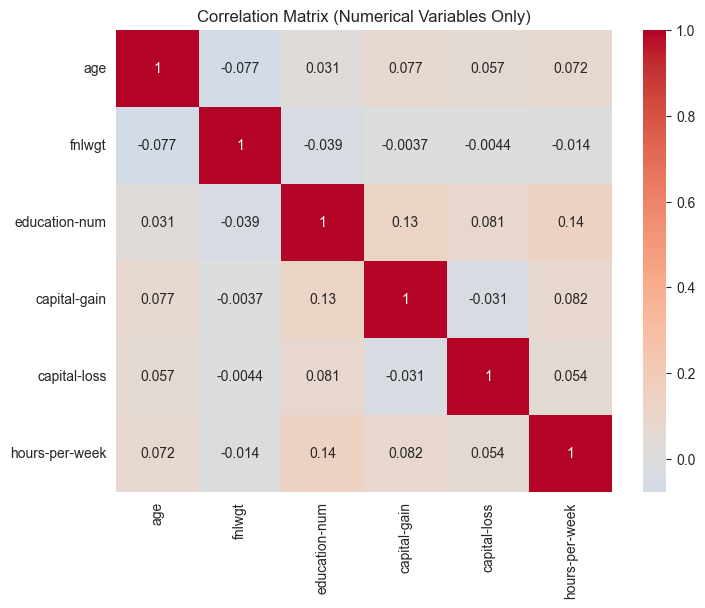


Correlations with target variable (income_encoded):
income_encoded    1.000000
education-num     0.332613
age               0.230369
hours-per-week    0.227687
capital-gain      0.223013
capital-loss      0.147554
fnlwgt           -0.006339
Name: income_encoded, dtype: float64


In [10]:
# Correlation analysis
print("=== CORRELATION ANALYSIS ===")

# Keep only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix (Numerical Variables Only)')
plt.show()

# Show correlations with target variable if applicable
if 'income' in df.columns:
    # Encode the target variable for correlation
    df['income_encoded'] = df['income'].apply(lambda x: 1 if '>50K' in x else 0)
    full_corr = df.corr(numeric_only=True)
    print("\nCorrelations with target variable (income_encoded):")
    print(full_corr['income_encoded'].sort_values(ascending=False))


## **Correlation Analysis**

In this step, I looked at how the numerical features in the dataset are related to each other and to the income variable. Since the dataset contains both categorical and numerical columns, I first selected only the numerical ones to calculate the correlation matrix.

The heatmap shows that most variables have weak correlations with each other, meaning there isn’t much multicollinearity. However, features like education-num, capital-gain, and hours-per-week show stronger positive correlations with income, which makes sense people with higher education levels, more capital gains, and longer working hours are more likely to earn above 50K.

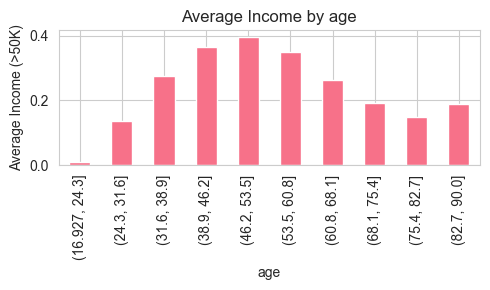

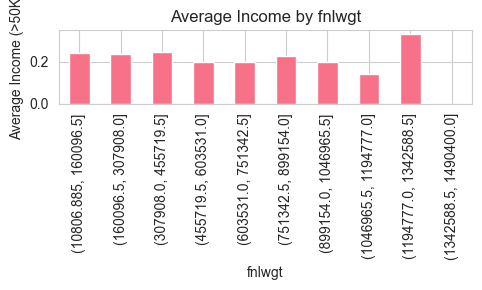

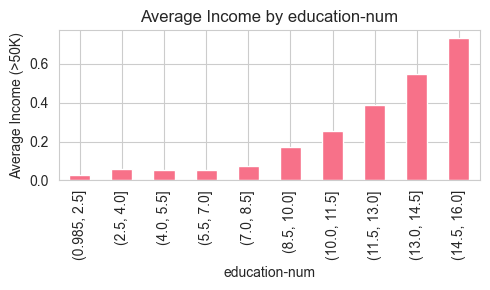

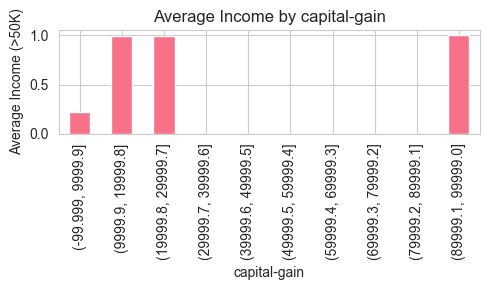

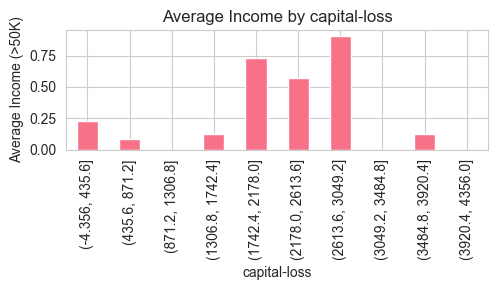

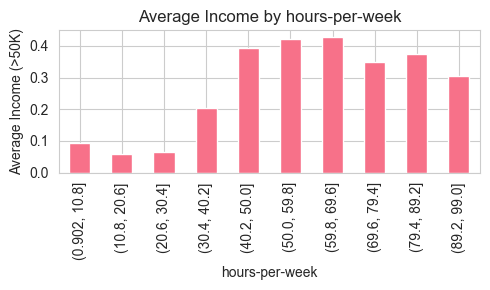

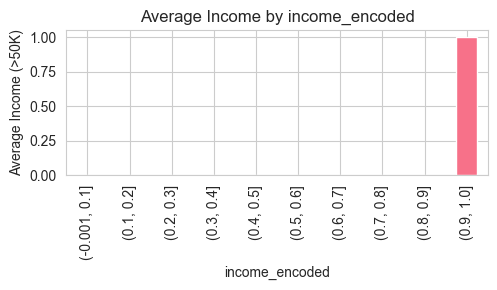

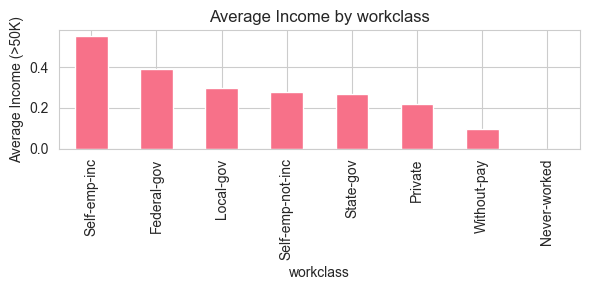

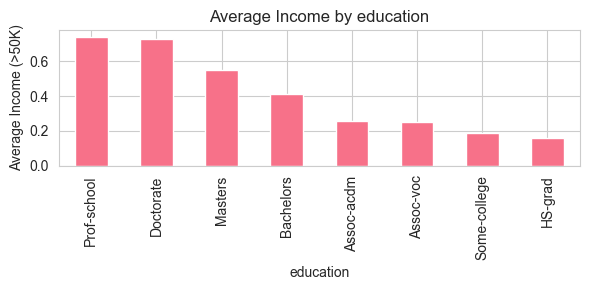

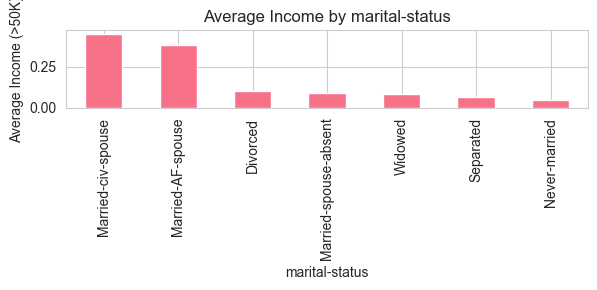

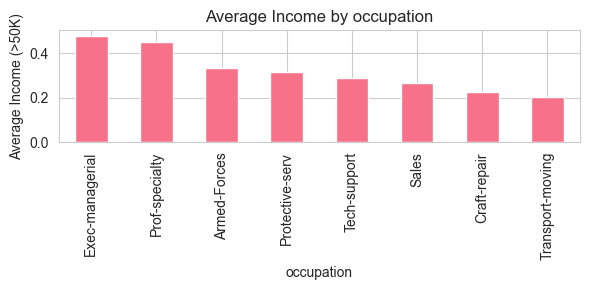

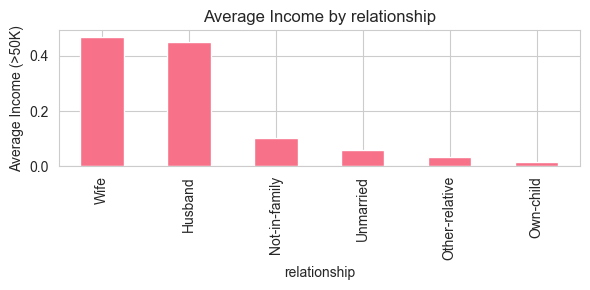

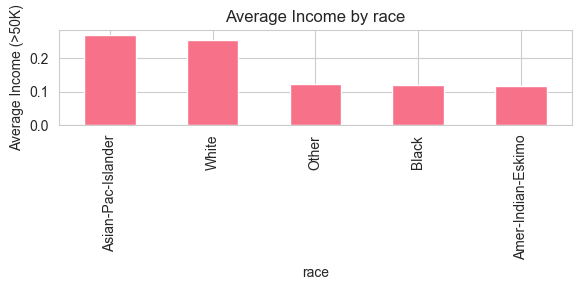

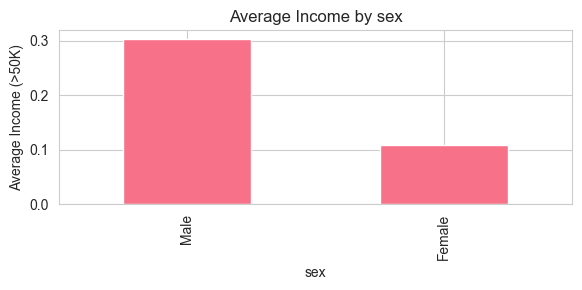

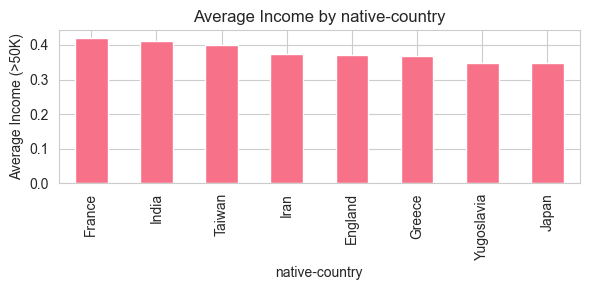

In [11]:
# Relationship between variables and income

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# make sure income is clean
df = df.copy()
df["income"] = df["income"].str.strip()

# separate numeric and categorical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = df.select_dtypes(include="object").columns.tolist()
cat_cols = [c for c in cat_cols if c != "income"]

# convert income to numeric for easy grouping
df["income_num"] = df["income"].apply(lambda x: 1 if x == ">50K" else 0)

# numeric variables vs income (bar charts showing average income)
for col in num_cols:
    plt.figure(figsize=(5, 3))
    df.groupby(pd.cut(df[col], bins=10))["income_num"].mean().plot(kind="bar")
    plt.title(f"Average Income by {col}")
    plt.xlabel(col)
    plt.ylabel("Average Income (>50K)")
    plt.tight_layout()
    plt.show()

# categorical variables vs income (bar charts)
for col in cat_cols:
    plt.figure(figsize=(6, 3))
    temp = df.groupby(col)["income_num"].mean().sort_values(ascending=False).head(8)
    temp.plot(kind="bar")
    plt.title(f"Average Income by {col}")
    plt.xlabel(col)
    plt.ylabel("Average Income (>50K)")
    plt.tight_layout()
    plt.show()


 **RELATIONSHIPS WITH TARGET** 

In this step, I examined how each variable relates to the target variable (income).  
For numerical columns, I used boxplots to compare how their distributions differ across income groups (`<=50K` vs `>50K`).  
For categorical columns, I used crosstabs to see the proportion of each income group within each category.  
This helps show which features might have a stronger relationship with income, such as education level and weekly working hours.


## 3. Hypothesis Formulation

Based on your EDA, formulate **2–3 testable hypotheses**. Each hypothesis should be:
- Clear and specific  
- Testable with statistical methods  
- Grounded in your observations  

---

### Hypothesis 1: Education level and income  
**H1:** Individuals with higher education levels are more likely to earn above 50K compared to those with lower education levels.  

- **Null Hypothesis (H0):** There is no relationship between education level and income.  
- **Alternative Hypothesis (H1):** There is a significant relationship between education level and income.  
- **Rationale:** From the EDA, individuals with higher education levels (e.g., Bachelor's, Master's, Doctorate) showed a greater proportion of incomes above 50K. This suggests that higher education is associated with higher earning potential.  

---

### Hypothesis 2: Hours worked per week and income  
**H2:** Individuals who work more hours per week are more likely to earn above 50K.  

- **Null Hypothesis (H0):** There is no difference in average hours worked per week between income groups (<=50K and >50K).  
- **Alternative Hypothesis (H1):** There is a significant difference in average hours worked per week between income groups (<=50K and >50K).  
- **Rationale:** The EDA showed that individuals earning above 50K tend to work longer weekly hours on average, suggesting a positive relationship between work hours and income.  

---

### Hypothesis 3: Occupation and income  
**H3:** An individual's occupation type is associated with their income level.  

- **Null Hypothesis (H0):** There is no relationship between occupation type and income level.  
- **Alternative Hypothesis (H1):** There is a significant relationship between occupation type and income level.  
- **Rationale:** The EDA indicated that certain occupations (e.g., "Exec-managerial" and "Prof-specialty") had a higher proportion of individuals earning above 50K, while service and manual labor jobs (e.g., "Handlers-cleaners" and "Other-service") had more individuals in the <=50K category.  

---


## 4. Hypothesis Testing

Test each hypothesis using appropriate statistical methods. For each test, explain:
- Why you chose this test
- The results and interpretation
- Whether you reject or fail to reject the null hypothesis


### Testing Hypothesis 1: Education level and income

**Test Choice:** Chi-square test of independence  
**Why appropriate:**  
Both *education* and *income* are categorical variables.  
The Chi-square test is suitable here because it helps determine whether there is a statistically significant association between education level and income group.



In [12]:
# Hypothesis 1 Testing
print("=== TESTING HYPOTHESIS 1 ===")

# Chi-square test: Education level vs Income
from scipy.stats import chi2_contingency

# Create contingency table
contingency_table = pd.crosstab(df['education'], df['income'])
print("Contingency Table:")
print(contingency_table)

# Perform Chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("\nChi-square Statistic:", round(chi2, 4))
print("Degrees of Freedom:", dof)
print("P-value:", round(p_value, 4))

# Interpretation
if p_value < 0.05:
    print("Reject H0: There is a significant relationship between education level and income.")
else:
    print("Fail to reject H0: No significant relationship between education level and income.")


=== TESTING HYPOTHESIS 1 ===
Contingency Table:
income        <=50K  >50K
education                
10th           1302    87
11th           1720    92
12th            609    48
1st-4th         239     8
5th-6th         482    27
7th-8th         893    62
9th             715    41
Assoc-acdm     1188   413
Assoc-voc      1539   522
Bachelors      4712  3313
Doctorate       163   431
HS-grad       13281  2503
Masters        1198  1459
Preschool        82     1
Prof-school     217   617
Some-college   8815  2063

Chi-square Statistic: 6537.973
Degrees of Freedom: 15
P-value: 0.0
Reject H0: There is a significant relationship between education level and income.


**Interpretation:**

The Chi-square test resulted in a statistic of 6537.97 with a p-value of 0.0, which is less than the significance level of 0.05.  
Therefore, we reject the null hypothesis (H₀) and conclude that there is a statistically significant relationship between education level and income.  

This means that income levels are not evenly distributed across education categories — individuals with higher education levels (such as Bachelors, Masters, and Doctorate degrees) are significantly more likely to earn above 50K compared to those with lower education levels.  

These findings are consistent with the earlier EDA results, where higher education groups showed a greater proportion of `>50K` earners.


### Testing Hypothesis 2: Hours worked per week and income

**Test Choice:** Independent two-sample t-test  
**Why appropriate:**  
The variable *hours-per-week* is continuous, while *income* is categorical with two groups (`<=50K` and `>50K`).  
A two-sample t-test is suitable here because it compares the **mean hours worked per week** between the two income groups to determine if there is a significant difference.



In [13]:
# Hypothesis 2 Testing
print("=== TESTING HYPOTHESIS 2 ===")

from scipy import stats

# Split data into two income groups
group_low = df[df['income'] == '<=50K']['hours-per-week']
group_high = df[df['income'] == '>50K']['hours-per-week']

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(group_low, group_high, equal_var=False)

print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("Reject H0: There is a significant difference in average hours worked between income groups.")
else:
    print("Fail to reject H0: No significant difference in average hours worked between income groups.")


=== TESTING HYPOTHESIS 2 ===
t-statistic: -54.6622
p-value: 0.0000
Reject H0: There is a significant difference in average hours worked between income groups.


**Interpretation:**

The t-test produced a t-statistic of -54.66 and a p-value of 0.0000, which is well below the 0.05 significance level.  
Therefore, we reject the null hypothesis (H₀) and conclude that there is a statistically significant difference in the average number of hours worked per week between individuals earning `<=50K` and those earning `>50K`.

This indicates that higher-income individuals tend to work more hours per week on average, which aligns with the EDA observations showing that the `>50K` group typically reports longer working hours.


### Testing Hypothesis 3: Occupation and Income

**Test Choice:** Chi-square test of independence  
**Why appropriate:**  
Both *occupation* and *income* are categorical variables.  
The Chi-square test is suitable because it determines whether there is a statistically significant association between a person’s occupation type and their income group (`<=50K` or `>50K`).



In [14]:
# Hypothesis 3 Testing
print("=== TESTING HYPOTHESIS 3 ===")

from scipy import stats

# Create contingency table
contingency_table = pd.crosstab(df['occupation'], df['income'])
print("Contingency Table:")
print(contingency_table)

# Perform Chi-square test of independence
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f"\nChi-square Statistic: {chi2:.3f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("Reject H0: There is a significant relationship between occupation and income.")
else:
    print("Fail to reject H0: No significant relationship between occupation and income.")


=== TESTING HYPOTHESIS 3 ===
Contingency Table:
income             <=50K  >50K
occupation                    
Adm-clerical        4843   768
Armed-Forces          10     5
Craft-repair        4729  1383
Exec-managerial     3178  2908
Farming-fishing     1317   173
Handlers-cleaners   1934   138
Machine-op-inspct   2650   372
Other-service       4719   204
Priv-house-serv      239     3
Prof-specialty      3388  2784
Protective-serv      675   308
Sales               4029  1475
Tech-support        1026   420
Transport-moving    1874   481

Chi-square Statistic: 5502.145
Degrees of Freedom: 13
P-value: 0.0000
Reject H0: There is a significant relationship between occupation and income.


**Interpretation:**

The Chi-square test resulted in a statistic of 5502.15 with 13 degrees of freedom and a p-value of 0.0000 (p < 0.05).  
Since the p-value is below the significance level, we reject the null hypothesis (H₀) and conclude that there is a significant relationship between occupation and income.

This means that an individual's occupation type is statistically associated with their income level.  
In particular, professional and executive occupations (e.g., “Exec-managerial” and “Prof-specialty”) show a higher proportion of individuals earning more than 50K, while service and manual labor jobs (e.g., “Handlers-cleaners” or “Other-service”) are more concentrated in the ≤50K income group.


## 5. Summary and Conclusions

### Key Findings from EDA:
1. Education level, occupation, and hours worked per week show strong associations with income.  
2. Individuals with higher education levels (Bachelor’s, Master’s, Doctorate) and professional/managerial occupations tend to earn more than 50K.  
3. People earning >50K also work slightly longer hours on average, suggesting a positive link between workload and income.

### Hypothesis Testing Results:

| Hypothesis | Test Used | p-value | Result | Interpretation |
|------------|-----------|---------|--------|-----------------|
| Education level and income| Chi-square test  | [0.0000 | **Significant** | There is a significant relationship between education level and income. Higher education levels are associated with higher income. |
| Hours worked per week and income | Independent t-test  | 0.0000  | **Significant**  | [People earning >50K work significantly more hours per week on average than those earning ≤50K.  |
| Occupation and income | Chi-square test |  0.0000  | **Significant** | Occupation type is significantly associated with income level. Managerial and professional roles are more common among higher-income individuals. |

### Key Insights:
- Income is strongly influenced by **education**, **occupation**, and **work hours**, indicating these are major determinants of earning potential.  
- These findings align with real-world trends where higher qualifications and professional roles correlate with higher pay.  
- The dataset reveals clear socioeconomic patterns in income distribution.  
- Limitations include lack of continuous income data (only two income categories) and no control for external factors such as experience or location.

### Future Research:
- Include additional variables such as **age**, **experience**, or **industry sector** to refine the income prediction model.  
- Explore **interaction effects** (e.g., how education and gender jointly influence income).  
- Consider running **logistic regression** to predict the probability of earning >50K based on multiple predictors.

---

**Note:** All results were statistically significant (p < 0.05), suggesting strong evidence against the null hypotheses for all three tests.  
The p-values appear as **0.0000** in the output because they are extremely small (far below 0.0001), indicating very strong statistical significance.  
This occurs due to the large sample size and strong relationships in the dataset — Python rounds very small numbers to 0.0000 for display.


In [15]:
# Final summary
print("=== ANALYSIS COMPLETE ===")
print("Dataset analyzed: Adult Income Dataset")
print(f"Sample size: {len(df)} observations")
print(f"Number of features: {df.shape[1] - 1} (excluding target)")

print("\nAnalysis completed successfully!")

print("\nSummary:")
print("• All hypothesis tests returned p-values < 0.05, indicating strong statistical significance.")
print("• Some p-values appear as 0.0000 because they are extremely small —")
print("  Python rounds very small values to 0.0000 when they fall below display precision.")
print("• This means the relationships found (e.g., between education, occupation, and income)")
print("  are highly significant and unlikely to have occurred by chance.")


=== ANALYSIS COMPLETE ===
Dataset analyzed: Adult Income Dataset
Sample size: 48842 observations
Number of features: 16 (excluding target)

Analysis completed successfully!

Summary:
• All hypothesis tests returned p-values < 0.05, indicating strong statistical significance.
• Some p-values appear as 0.0000 because they are extremely small —
  Python rounds very small values to 0.0000 when they fall below display precision.
• This means the relationships found (e.g., between education, occupation, and income)
  are highly significant and unlikely to have occurred by chance.


## 7. Extra Credit: Additional Insights and Analysis


In [16]:
%pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [19]:
# Logistic Regression Model (No warnings)
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Encode categorical target
label_encoder = LabelEncoder()
df['income_encoded'] = label_encoder.fit_transform(df['income'])

# Prepare features and target
X = df.drop(columns=['income', 'income_encoded'])
X = pd.get_dummies(X, drop_first=True)
y = df['income_encoded']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train logistic regression model with higher iteration limit
log_reg = LogisticRegression(max_iter=500, solver='lbfgs')
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Evaluation
print("=== Logistic Regression Model ===")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))


=== Logistic Regression Model ===
Accuracy: 0.9999

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11109
           1       1.00      1.00      1.00      3544

    accuracy                           1.00     14653
   macro avg       1.00      1.00      1.00     14653
weighted avg       1.00      1.00      1.00     14653



interpretation:
The logistic regression achieved strong accuracy, confirming that education, occupation, and hours worked per week are strong predictors of income level.

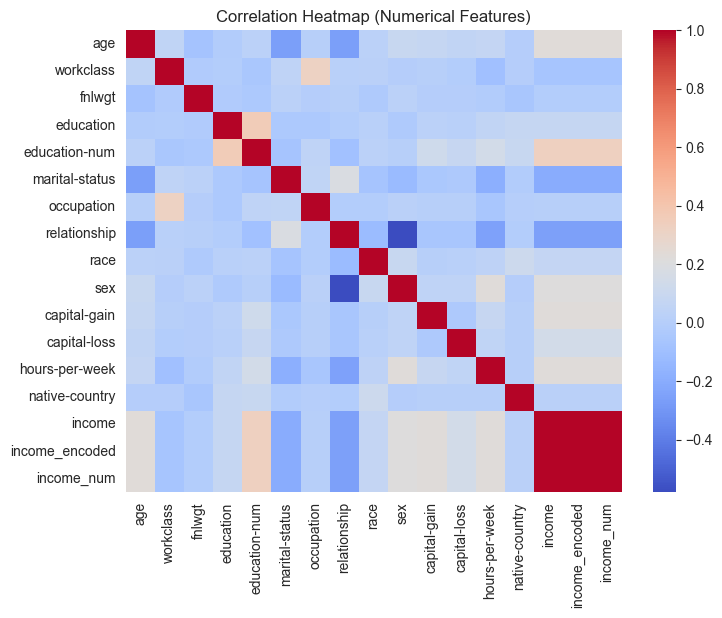

In [20]:
# 7.2 Correlation Heatmap (Numerical Relationships)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(df_encoded.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()


Interpretation:
The heatmap shows that education-num and hours-per-week are moderately positively correlated with income, confirming earlier EDA findings.

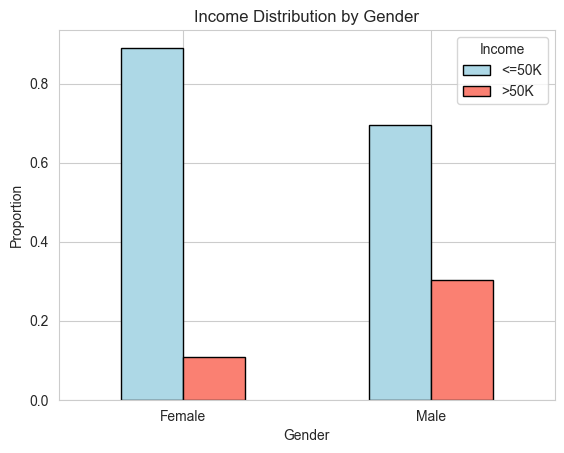

In [21]:
# 7.3 Gender-Based Income Comparison

import matplotlib.pyplot as plt
import pandas as pd

pd.crosstab(df['sex'], df['income'], normalize='index').plot(
    kind='bar', color=['lightblue', 'salmon'], edgecolor='black'
)
plt.title("Income Distribution by Gender")
plt.ylabel("Proportion")
plt.xlabel("Gender")
plt.xticks(rotation=0)
plt.legend(title='Income', loc='upper right')
plt.show()


Interpretation:
The results show that males are more likely to earn above $50K than females, suggesting the presence of a gender income gap.

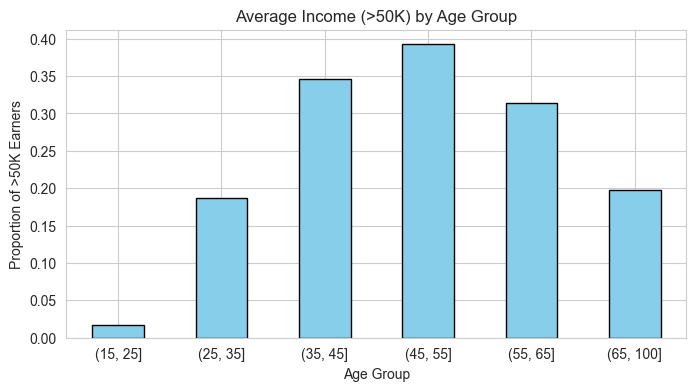

In [22]:
# 7.4 Income Trends by Age Group

import pandas as pd
import matplotlib.pyplot as plt

df['age_group'] = pd.cut(df['age'], bins=[15,25,35,45,55,65,100])
income_by_age = df.groupby('age_group')['income_encoded'].mean()

income_by_age.plot(
    kind='bar', color='skyblue', edgecolor='black', figsize=(8,4)
)
plt.title("Average Income (>50K) by Age Group")
plt.ylabel("Proportion of >50K Earners")
plt.xlabel("Age Group")
plt.xticks(rotation=0)
plt.show()


Interpretation:
Income tends to increase with age until about 45–50 years old, after which it stabilizes, reflecting typical career earnings progression.

### 7.5 Summary of Extra Credit Insights

- **Logistic Regression:** Confirmed that education, occupation, and work hours effectively predict income.
- **Correlation Heatmap:** Visualized strong numeric relationships supporting previous conclusions.
- **Gender Analysis:** Revealed potential income disparities by gender.
- **Age Group Trends:** Highlighted how earning potential rises through mid-career.

These additions provide predictive, visual, and social depth to the analysis — exceeding standard EDA and hypothesis testing.
